# 컴퓨터 비전 데이터셋 1

**컴퓨터 비전(Computer Vision)** 은 컴퓨터가 이미지나 비디오에서 개체와 사람을 식별하고 파악할 수 있도록 지원하는 컴퓨터 과학 분야 


이를 이용한 응용 분야는 대표적으로 아래의 세 가지가 있음
* **Image Classification :**  컴퓨터가 입력된 이미지를 어떤 클래스(카테고리)에 속하는지 분류하는 과정
* **Object Detection :**  이미지나 비디오 안에서 여러 사물을 인식하고 위치를 파악하는 과정
* **Image Segmentation :** 이미지나 비디오 안에서 구성하는 여러 부분이나 객체를 구분하는 과정 

**[참고]**
Object Detection은 사각형과 같은 도형으로 객체를 표시, Image Segmentation은 실제 객체의 외곽 좌표를 추출한다는 점에서 차이가 있음 

![](./img/computer_vision.png)

**[목차]**
* **MNIST**
* **Pascal VOC**
* **COCO** - 다음 실습에서 진행


## 1. MNIST

**MNIST** 는 손으로 작성한 숫자 이미지로 구성된 데이터셋

각 이미지가 28x28 픽셀로 크기가 작음 

주로 이미지 분류(Classification)이나 숫자 인식을 위해 자주 사용됨

### 1.1 데이터 불러오기

MNIST 데이터셋은 **Keras 라이브러리**를 사용하면 쉽게 접근할 수 있음

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("X train :", x_train.shape)
print("Y train :", y_train.shape)
print("X test :", x_test.shape)
print("Y test :", y_test.shape)

X train : (60000, 28, 28)
Y train : (60000,)
X test : (10000, 28, 28)
Y test : (10000,)


### 1.2 데이터 확인하기 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [7]:
number= random.randint(0, 60000)
number

25141

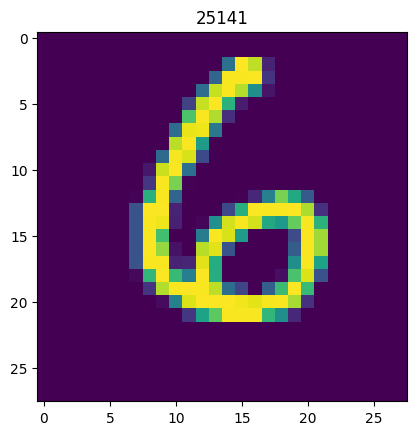

In [8]:
plt.title(number)

plt.imshow(x_train[number])
plt.show()

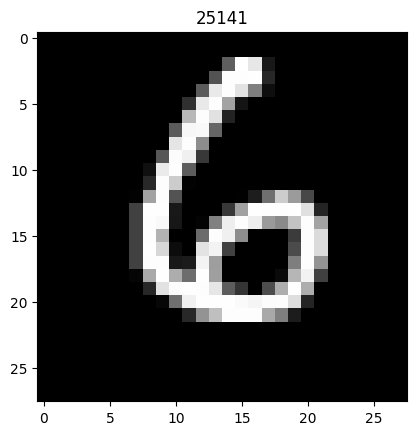

In [9]:
plt.title(number)

plt.imshow(x_train[number], cmap="gray")
plt.show()

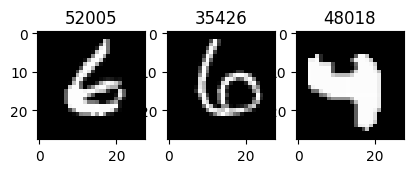

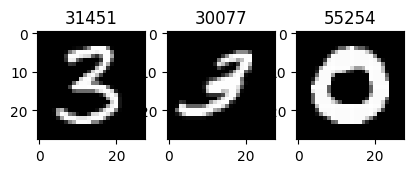

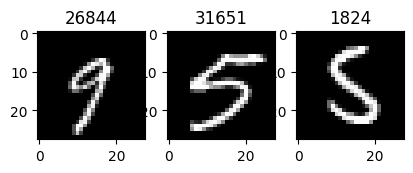

In [10]:
for i in range(1, 4) : 
    for j in range(1, 4) :
        plt.subplot(i, 4, j)
        
        number= random.randint(0, 60000)

        plt.title(number)
        plt.imshow(x_train[number], cmap="gray")
    
    plt.show()

## 2. Pascal VOC

**Pascal VOC** 은 컴퓨터 비전 분야의 대표적인 데이터셋 중 하나 

Object Detection 과 Image Segmentation 분야에서 많이 사용됨

아래의 홈페이지에 접속하면 Pascal VOC 데이터셋을 다운로드 할 수 있음
- link : http://host.robots.ox.ac.uk/pascal/VOC/index.html


### 2.1 이미지 데이터 확인하기

Pascal VOC의 이미지 데이터는 `JPEGImages` 폴더에 저장되어 있음

In [11]:
from PIL import Image 

In [12]:
img_path = "./VOC2012/JPEGImages/2007_001595.jpg"

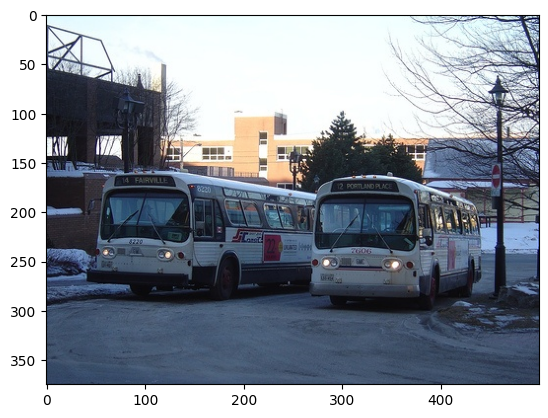

In [13]:
image = Image.open(img_path)  

plt.imshow(image)
plt.show()

### 2.2 어노테이션 데이터 확인하기(XML 파싱)

Pascal VOC 에서는 이미지 내 객체의 위치 정보(어노테이션)를 동일한 이름을 가진 **XML 파일**에 저장되어 있음 

이를 위해서는 **XML 파싱**이 필요

저장된 XML 파일은 `Annotations` 에서 확인할 수 있음

**[XML 파일 샘플]**

```xml
<annotation>
	<folder>VOC2012</folder>
	<filename>2007_001595.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>bus</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>268</xmin>
			<ymin>162</ymin>
			<xmax>442</xmax>
			<ymax>296</ymax>
		</bndbox>
	</object>
	<object>
		<name>bus</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>40</xmin>
			<ymin>158</ymin>
			<xmax>275</xmax>
			<ymax>288</ymax>
		</bndbox>
	</object>
</annotation>
```

JSON과 마찬가지로 XML을 파싱하기 위해서는 별도의 라이브러리가 필요 

XML 파싱을 위한 `xml 라이브러리` 는 내장 라이브러리이므로 별도의 설치 과정 없이 사용할 수 있음

In [14]:
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree

In [15]:
xml_file = "./VOC2012/Annotations/2007_001595.xml"

XML 파일을 파싱하기 위해서는 `parse` 함수가 필요

`parse` 함수를 사용하면 경로에 있는 XML 파싱하여 XML 문서의 루트 요소(가장 상단의 태그)를 반환

In [16]:
tree = Et.parse(xml_file)
tree

`getroot` 함수를 이용하야 XML 문서의 루트 엘리먼트를 반환

In [17]:
root = tree.getroot()
root

<Element 'annotation' at 0x000001247C20F810>

성공적으로 XML 문서를 불러왔는지 확인하기 위해 어노테이션 데이터 중에서 이미지의 가로, 세로 사이즈를 나타내는 데이터를 파싱


```xml
<annotation>
	<folder>VOC2012</folder>
	<filename>2007_001595.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<!-- parsing target -->
		<width>500</width>
		<height>375</height>
		
		<depth>3</depth>
	</size>
```

`find` 함수를 사용하면 지정한 태그명과 일치하는 첫번째 하위요소(element)를 반환

`size`의 하위에 있는 `width`와 `height`를 찾은 `text`를 이용하여 다음 태그 사이에 있는 텍스트를 추출

In [18]:
size = root.find("size")

width = size.find("width").text
height = size.find("height").text

print("width :", width, "px")
print("height :", height, "px")

width : 500 px
height : 375 px


`object` 태그에서 `name`과 `bndbox` 정보를 찾고 `bndbox`에서 좌표 정보를 파싱

In [19]:
object = root.find("object")

name = object.find("name").text
    
bndbox = object.find("bndbox")
    
xmin = int(bndbox.find("xmin").text)
ymin = int(bndbox.find("ymin").text)
xmax = int(bndbox.find("xmax").text)
ymax = int(bndbox.find("ymax").text)

In [20]:
print(name)

print("x min :", xmin)
print("y min :", ymin)
print("x max :", xmax)
print("y max :", ymax)

bus
x min : 268
y min : 162
x max : 442
y max : 296


### 2.3 바운딩 박스 그리기 (matplotlib 이용)

좌표 정보를 이용하여 이미지 위에 표시하는 작업을 진행

이전 실습처럼 matplotlib 라이브러리를 이용하여 객체를 표시

In [21]:
from matplotlib.patches import Polygon

도형을 정확히 표현하기 위해서는 **펜을 이용해서 그리는 것처럼 좌표의 순서를 정확하게 기재**해야 함

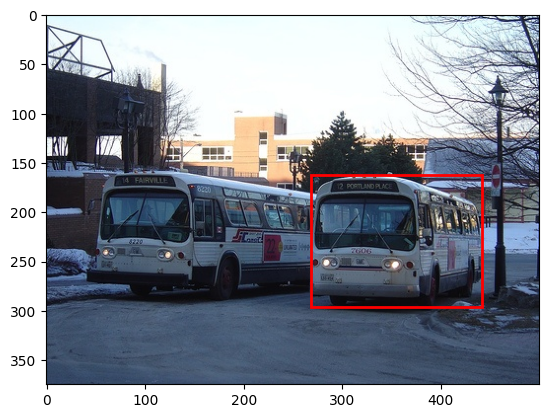

In [22]:
image = Image.open(img_path)

fig, ax = plt.subplots()
ax.imshow(image)  

polygon = Polygon(
    [[xmin, ymin], [xmin, ymax], [xmax, ymax], [xmax, ymin]], 
    closed=True, 
    linewidth=2, 
    edgecolor='r', 
    facecolor='none'
)  
ax.add_patch(polygon)

plt.show()

**[잘못된 예시]**

`[xmax, ymax]` 의 순서를 잘못 표기하여 그림처럼 잘못된 도형을 생성하게 됨

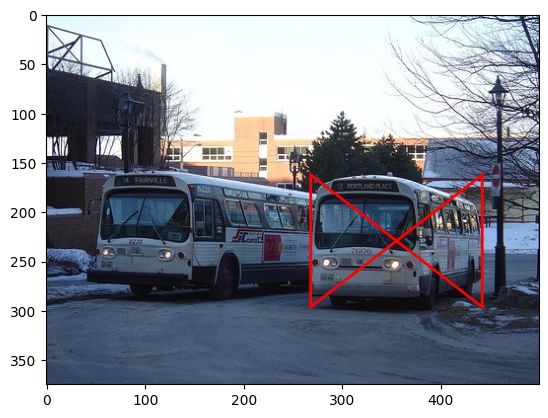

In [23]:
image = Image.open(img_path)

fig, ax = plt.subplots()
ax.imshow(image)  

polygon = Polygon(
    [[xmin, ymin], [xmin, ymax], [xmax, ymin], [xmax, ymax]], 
    closed=True, 
    linewidth=2, 
    edgecolor='r', 
    facecolor='none'
)  
ax.add_patch(polygon)

plt.show()

### 2.4 바운딩 박스 그리기 (OpenCV 이용)

지금까지는 이미지 데이터를 시각화하는데 `matplotlib` 를 중심으로 사용하였음

하지만 이미지 데이터를 더욱 효과적으로 처리하기 위해서는 `openCV` 라는 라이브러리가 필요 

In [24]:
import cv2

In [25]:
image = cv2.imread(img_path)
image

array([[[255, 244, 222],
        [255, 245, 223],
        [255, 245, 223],
        ...,
        [221, 195, 181],
        [243, 223, 206],
        [225, 207, 190]],

       [[255, 246, 224],
        [255, 247, 225],
        [255, 247, 225],
        ...,
        [ 85,  62,  47],
        [142, 124, 107],
        [193, 177, 160]],

       [[255, 249, 226],
        [254, 250, 226],
        [255, 251, 227],
        ...,
        [203, 184, 169],
        [ 96,  80,  64],
        [185, 170, 154]],

       ...,

       [[ 97,  67,  48],
        [ 97,  67,  48],
        [ 98,  68,  51],
        ...,
        [ 82,  61,  46],
        [ 82,  61,  46],
        [ 83,  62,  47]],

       [[ 98,  68,  49],
        [ 97,  67,  48],
        [ 98,  68,  51],
        ...,
        [ 83,  62,  47],
        [ 85,  64,  49],
        [ 87,  66,  51]],

       [[ 99,  69,  50],
        [ 97,  67,  48],
        [ 97,  67,  50],
        ...,
        [ 87,  66,  51],
        [ 90,  69,  54],
        [ 92,  71,  56]]

openCV의 `rectangle` 함수를 이용하면 matplotlib의 `polygon` 보다 더 편리하게 도형을 생성할 수 있음

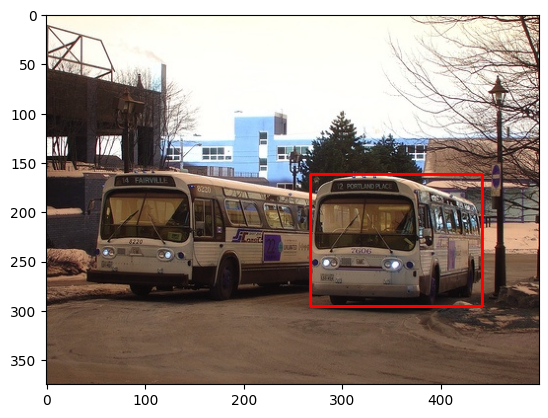

In [26]:
cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

plt.imshow(image)
plt.show()

하지만 `openCV` 의 `imread`를 이용하여 이미지를 불러오면 기본적으로 이미지가 **BGR(Blue, Green, Red) 형식으로 처리**되는 현상이 있음

이를 위해 BGR(Blue, Green, Red) 이미지를 RGB로 변환하는 `cvtColor` 함수를 사용

In [27]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

다시 이미지 위에 도형을 그리면 정상적으로 표현되는 것을 확인할 수 있음

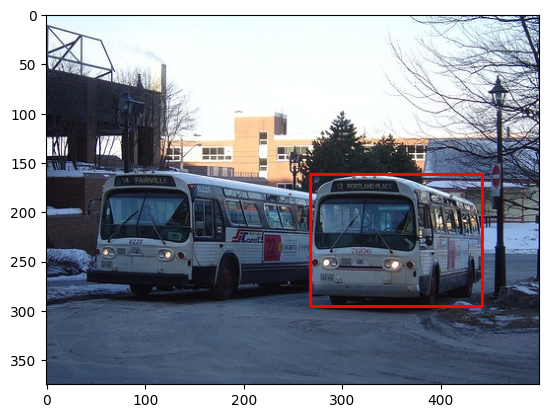

In [28]:
cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

plt.imshow(image_rgb)
plt.show()

## [TODO] 어노테이션 정보를 이용하여 다른 이미지 객체 표시하기
`Annotations` 와 `JPEGImages` 폴더에 있는 데이터, 그리고 앞에서 학습한 코드를 이용하여 자신만의 객체 인식 코드를 작성해보세요. 

Pascal VOC 데이터셋은 `/mnt/elice/dataset`에 저장되어 있습니다. 

자세한 내용은 아래의 이미지를 참고해주세요.

![](./img/file_tree.png)

*※ 본 실습은 제출이 없는 실습입니다.*

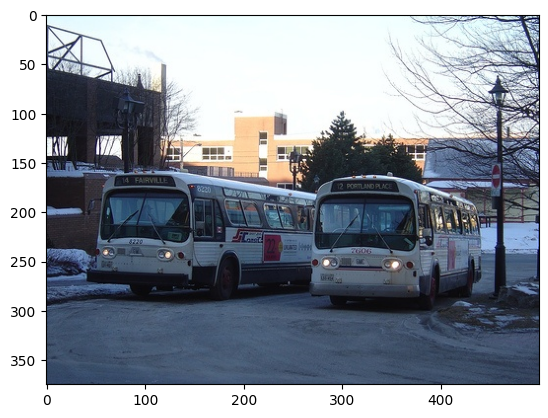

In [34]:
dataset_path = "C:\\Users\\302-15\\Desktop\\CV-practice\\Selfdriving\\q4\\"
voc_path = "VOC2012/JPEGImages/"
img_name = "2007_001595.jpg"


test_image = Image.open(dataset_path + voc_path + img_name)  

plt.imshow(test_image)
plt.show()